In [1]:
using LinearAlgebra, DataFrames, CSV, Statistics, Plots, Polynomials

## zad.1
Ustal losowe (referencyjne) `x` rozmiaru 1000 oraz losowe `A` rozmiaru 1000x1000, policz `b=A*x`.
Nastepnie rozwiąż równanie `Ax=b` trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego `x`) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania!

In [2]:
x = rand(1000)
A = rand(1000, 1000)
b = A * x

1000-element Vector{Float64}:
 247.7566406522405
 244.44644053117463
 250.28069758843552
 249.75984647673164
 244.54185199605706
 243.64668003276756
 244.50164119638396
 254.5520584429758
 247.16639017807302
 235.1465688363784
 253.39891678347345
 254.56599094185214
 252.556453336568
   ⋮
 249.71074508653973
 243.87743143844165
 244.86266983788497
 240.8864669127484
 235.33871316839364
 244.23247752354047
 259.8296044012947
 248.40649134931783
 252.3432248217197
 247.91347933466972
 250.7353922370965
 240.23138390890196

In [3]:
quality(y) = reduce((s, t) -> s + abs(t), y - x)

quality (generic function with 1 method)

In [4]:
function invTest(A, b)
    return inv(A) * b
end

function divTest(A, b)
    return A \ b
end

function factorizeTest(A, b)
    return factorize(A) \ b
end

factorizeTest (generic function with 1 method)

In [5]:
invTest(A, b)
divTest(A, b)
factorizeTest(A, b)

1000-element Vector{Float64}:
 0.4849118173515903
 0.9025887803865501
 0.8734540180112587
 0.37022949957603
 0.6368892924543984
 0.10806135331877235
 0.7384398984586831
 0.7917446423017518
 0.8190569113939724
 0.921836145688989
 0.8400076132688847
 0.10043557428562021
 0.5032238604018866
 ⋮
 0.8305526246321918
 0.500525074178086
 0.9477220526764268
 0.4402142855741122
 0.06003564594461801
 0.33954404509396396
 0.16048989593387922
 0.4383861488072314
 0.07648815877571417
 0.9619736645732063
 0.5031658411326779
 0.5504648566318809

In [6]:
df = DataFrame(method = String[], time = Float64[], error = Float64[])
tests = [invTest, divTest, factorizeTest]
methods = ["inv", "\\", "factorize"]

for i in 1:3
    for j in 1:10
        time = @elapsed tests[i](A, b)
        error = quality(tests[i](A,b))
        push!(df, [methods[i], time, error])
    end
end

df

,method,time,error
,String,Float64,Float64
1,inv,0.364558,7.13344e-10
2,inv,0.359122,7.13344e-10
3,inv,0.0398409,7.13344e-10
4,inv,0.0369714,7.13344e-10
5,inv,0.038248,7.13344e-10
6,inv,0.0408072,7.13344e-10
7,inv,0.0384877,7.13344e-10
8,inv,0.0397986,7.13344e-10
9,inv,0.0397845,7.13344e-10


In [7]:
grouped = groupby(df, :method)
combined = combine(grouped, "time" => mean, "error" => mean)
combined

,method,time_mean,error_mean
,String,Float64,Float64
1,inv,0.103671,7.13344e-10
2,\\,0.0152496,3.61194e-10
3,factorize,0.0145872,3.61194e-10


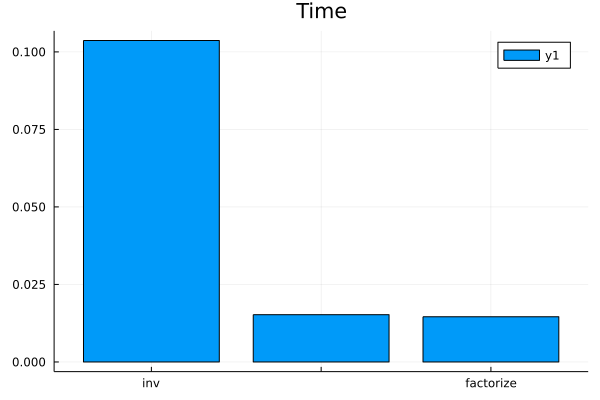

In [8]:
bar(methods, combined.time_mean, title="Time")

\: undefined symbol


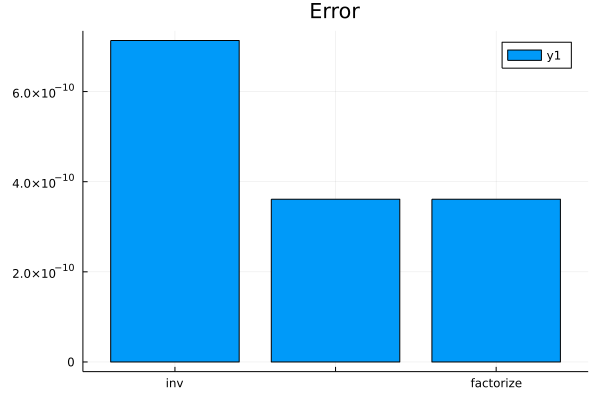

\: undefined symbol


In [9]:
bar(methods, combined.error_mean, title="Error")

## zad.2
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

In [10]:
data = CSV.read("data.csv", delim=",", DataFrame)
data = data[(data.method .== "better"), :]
data

,n,method,time
,Int64,String7,Float64
1,100,better,0.01
2,100,better,0.02
3,100,better,0.01
4,100,better,0.01
5,100,better,0.02
6,100,better,0.01
7,100,better,0.01
8,100,better,0.01
9,100,better,0.01


In [11]:
grouped = groupby(data, :n)
combined = combine(grouped, "time" => mean, "time" => std)

,n,time_mean,time_std
,Int64,Float64,Float64
1,100,0.012,0.00421637
2,200,0.097,0.00483046
3,300,0.322,0.00421637
4,400,0.765,0.00527046
5,500,1.496,0.00516398
6,600,2.578,0.00421637
7,700,4.09,0.00471405
8,800,6.101,0.00316228
9,900,8.686,0.00516398


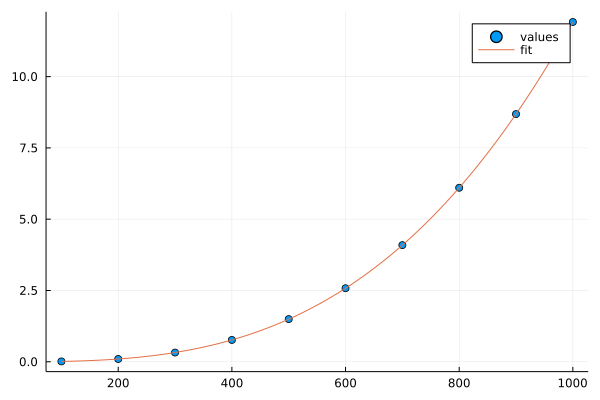

In [12]:
scatter(combined.n, combined.time_mean, label="values")
plot!(fit(combined.n, combined.time_mean, 3), extrema(combined.n)..., label="fit")

In [13]:
A_approx = zeros(10, 4)
for i in 1:4
    A_approx[:, i] = combined.n.^(4 - i)
end
A_approx[:, 4] = ones(10)
A_approx

10×4 Matrix{Float64}:
 1.0e6    10000.0     100.0  1.0
 8.0e6    40000.0     200.0  1.0
 2.7e7    90000.0     300.0  1.0
 6.4e7   160000.0     400.0  1.0
 1.25e8  250000.0     500.0  1.0
 2.16e8  360000.0     600.0  1.0
 3.43e8  490000.0     700.0  1.0
 5.12e8  640000.0     800.0  1.0
 7.29e8  810000.0     900.0  1.0
 1.0e9        1.0e6  1000.0  1.0

In [14]:
A_approx_f = factorize(A_approx)
A_approx_res = A_approx_f \ combined.time_mean

4-element Vector{Float64}:
  1.1918414918414908e-8
 -2.75058275058054e-8
  2.5944055944044757e-5
 -0.002799999999998399

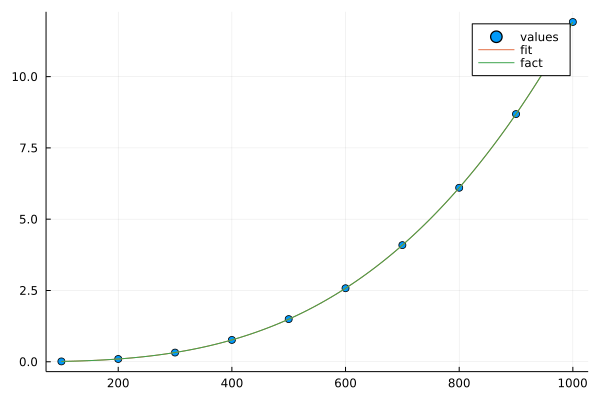

In [15]:
poly_approx = Polynomial(reverse(A_approx_res))

plot!(poly_approx, extrema(combined.n)..., label="fact")

## zad.3
Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

- uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

- zastosowanie faktoryzacji SVD - przykład zastosowania w uczeniu maszynowym https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254

- kompresji danych https://medium.com/balabit-unsupervised/image-compression-using-singular-value-decomposition-de20451c69a3


#### Wyznaczanie wartości własnych macierzy przy pomocy faktoryzacji QR
Algorytm sprowadza się do dwóch kroków:
* Krok zerowy: $ A_{0} = A $
* Krok k-ty: 
 - Oblicz faktoryzację QR macierzy $ A_{k} = Q_{k}R_{k} $, gdzie $Q_{k}$ to macierz ortogonalna, a $R_{k}$ to macierz trójkątna górna
 - Korzystając z własności mnożenia macierzy oraz ortogonalności $Q_{k}$, obliczamy: $A_{k+1} = R_{k}Q_{k} = Q^{-1}_{k}Q_{k}R_{k}Q_{k} = Q^{-1}_{k}A_{k}Q_{k} = Q^{T}_{k}A_{k}Q_{k}$
 
Macierze $A_{k}$ sa podobne, zatem mają takie same wartości własne. Macierze te zbiegają do pewnej trójkątnej macierzy, której wartości własne znajdują się na głównej przekątnej.

In [16]:
function findEigenvalues(A, iterations)
    for i in 1:iterations
        A_k = qr(A)
        A = Transpose(A_k.Q) * A * (A_k.Q)
    end
    ev = [A[i, i] for i in 1:size(A, 1)]
end

findEigenvalues (generic function with 1 method)

In [17]:
A = [3 2;
     4 1]
findEigenvalues(A, 100)

2-element Vector{Float64}:
  5.000000000000012
 -0.9999999999999998

Wynik z kalkulatora wartości własnych: $\lambda_{0} = 5, \lambda_{1} = -1$

In [18]:
A = [ 4  1;
     -2  1]
findEigenvalues(A, 1000)

2-element Vector{Float64}:
 3.000000000000013
 2.0

Wynik z kalkulatora wartości własnych: $\lambda_{0} = 3, \lambda_{1} = 2$

In [19]:
A = [2 0 1;
     0 2 0
     5 0 6]
findEigenvalues(A, 100)

3-element Vector{Float64}:
 7.000000000000008
 2.0
 0.9999999999999997

Wynik z kalkulatora wartości własnych: $\lambda_{0} = 7, \lambda_{1} = 2, \lambda_{2} = 1$